In [ ]:
"""
在已经计算出最小波动组合的各个股票的权重后，
计算最小波动组合的收益
"""


In [1]:
import os
os.chdir('D:/Python/Flies/Guanyun/barra/dataset/')

import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
"""
提取数据
这里的file名称为yyyy-mm-dd.csv的格式，
file内容为某日通过之前的组合优化所获得的最小波动组合的各个股票的权重
每个csv文件的列为十个Barra因子，行为stock，value为对应的值
"""
for root, dirs, files in os.walk('barra processing/new_vmatrix/'):
    pass
files = sorted(files)
for i in range(len(files)):
    files[i] = files[i][:-4]

In [4]:
stks_close = pd.read_csv('后复权数据-分类/收盘价(元).csv', encoding='gbk').set_index('日期')
stks_chg = pd.read_csv('后复权数据-分类/涨跌幅(%).csv', encoding='gbk').set_index('日期')
def change_sz_to_xshe(df) : 
    """
    将股票代码格式从wind改为joinquant
    """
    x_columns = df.columns.to_list()
    for i in range(len(x_columns)) : 
        if x_columns[i][:1] == '6' : 
            x_columns[i] = x_columns[i][:6] + '.XSHG'
        else : 
            x_columns[i] = x_columns[i][:6] + '.XSHE'
    df.columns = x_columns
    return df
stks_close = change_sz_to_xshe(stks_close)  
stks_chg = change_sz_to_xshe(stks_chg) + 1  # 对股票的日涨跌幅+1，如5%变为1.05，方便之后进行cumprod操作
trading_date = pd.read_csv('trading_date.csv').set_index('date')  # 获取交易日日历

size
beta
momentum
residual_volatility
non_linear_size
book_to_price_ratio
liquidity
earnings_yield
growth
leverage


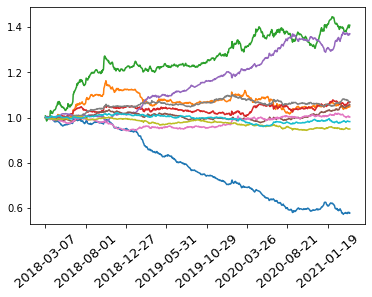

In [7]:
factor_list = ['size', 'beta', 'momentum', 'residual_volatility', 'non_linear_size',
       'book_to_price_ratio', 'liquidity', 'earnings_yield', 'growth','leverage']
for factor in factor_list : 
    print(factor)
    a = pd.Series(dtype='float64')
    for i in range(len(files)-1):
        weight_df = pd.DataFrame()
        min_vol_df = pd.read_csv('barra processing/new_vmatrix/' + files[i] + '.csv').set_index('Unnamed: 0')
        date_now = files[i]
        index_loc = trading_date.index.get_loc(date_now)  # 这里的file名称为yyyy-mm-dd.csv的格式，get_loc获取这一调仓日
        date_next = trading_date.iloc[index_loc+1:index_loc+2].index[0]
        weight_df = weight_df.append(min_vol_df[factor].rename(date_next))
        weight_df = weight_df.fillna(0)

        weight_df = weight_df[weight_df.iloc[0].sort_values().index[5:-6]]

        trading_month = sorted(trading_date[index_loc+1 : index_loc+22].index.to_list())
        new_df = pd.DataFrame(index=trading_month)
        weight_df = pd.merge(new_df,weight_df, how='left', left_index=True, right_index=True).sort_index() # 合并交易日历和数据
        weight_df.fillna(method='pad', inplace=True) # ffill
        return_df = stks_chg.loc[weight_df.index,weight_df.columns]
        return_df = return_df.fillna(0)

        a = pd.concat([a , ((weight_df.multiply(return_df-1).sum(axis=1)+1))])
    a = a.cumprod()
    a.plot()
plt.xticks(size='small',rotation=40,fontsize=13)
plt.show()
